# Examen

#### Instrucciones

- Crea en tu carpeta, un archivo llamado `examen` y pega el texto de las problemas en él (respeta el formato).

- Contesta inmediatamente abajo del problema.

- Gráficas en calidad profesional (pon ejes, unidades, colores, leyenda, etc.)

- La ortografía, redacción y habilidades de comunicación se tomarán en cuenta.

### Problema 1

<div class="alert alert-info">
    
**NOTA** Muestra las expresiones en cada inciso.
</div>

#### (a) Usando `Sympy`, declara las funciones.

In [1]:
from sympy.interactive import printing
printing.init_printing(use_latex = True)
import sympy as sym



In [10]:
from sympy import sin, cos

x = sym.Symbol('x')

y = cos(x)
z = sin(x)
w = 1/(sin(x)+cos(2*x))


#### (b) Obtén la derivada de $g(x)$

$$
g(x) = y(x)*z(x)
$$

In [9]:
(y*z).diff(x)

#### (c) Grafica $w(x)$ en el rango $[0,1]$

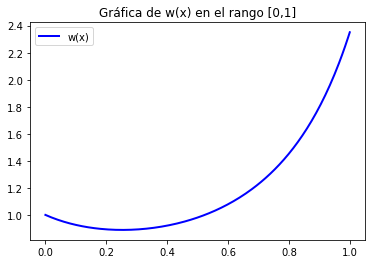

In [14]:
import numpy as np
import matplotlib.pyplot as plt

D = np.linspace(0,1,200)
I = 1/(np.sin(D)+np.cos(2*D))

plt.plot(D,I, color = "blue", linewidth = 2, linestyle = "-", label = "w(x)")

plt.legend(loc='best');
plt.title(u"Gráfica de w(x) en el rango [0,1]");

#### (d) Integra de manera indefinida $w(x)$ y luego evalúala desde $0$ a $1$.

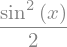

In [24]:
g = y*z

# Integración indefinida de w(x)
sym.integrate(g,x)

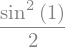

In [25]:
#Evaluar la integral de 0 a 1.
sym.simplify(sym.integrate(y*z,(x,0,1)))

#### (e) ¿Cuál es el límite de $y(x), z(x), g(x)$ y $w(x)$ cuando $x \to 0$.?

In [17]:
print("El límite de y(x) cuando x tiende a 0 es:")
sym.limit(y,x,0, dir="+-")

El límite de y(x) cuando x tiende a 0 es:


In [18]:
print("El límite de z(x) cuando x tiende a 0 es:")
sym.limit(z,x,0, dir="+-")

El límite de z(x) cuando x tiende a 0 es:


In [19]:
print("El límite de w(x) cuando x tiende a 0 es:")
sym.limit(w,x,0, dir="+-")

El límite de w(x) cuando x tiende a 0 es:


#### (f) Expanda $y(x)$ y $z(x)$ hasta 3 orden en serie de Taylor.

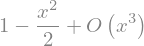

In [20]:
#Expansión de y:
sym.series(y,x,0,3)

In [21]:
#Expansión de z:
sym.series(z,x,0,3)

### Problema 2

El [**atractor de Rössler**](http://en.wikipedia.org/wiki/R%C3%B6ssler_attractor) esta descrito por el siguiente conjunto de ecuaciones:

$$
\frac{dx}{dt} = -y -z
$$

$$
\frac{dy}{dt} = x + ay
$$

$$
\frac{dz}{dt} = b + z(x-c)
$$

(a) Resuelva las ecuaciones numéricamente para 

$$
a=0.13 \quad b=0.2 \quad c=6.5 
$$

y condiciones iniciales

$$
x(0)=0 \quad y(0)=0 \quad z(0)=0 
$$

use el método de Runge-Kutta de 2do orden.

In [35]:
#Valores de los parámetros:
a, b, c = 0.13, 0.2, 6.5

#Condiciones iniciales:
Y0 = np.array([0,0,0])

# Derivadas:
def deriv(estado,t):
    """
    estado es una lista con tres argumentos: x,y,z.
    """
    g1 = -estado[1] - estado[2]
    g2 = estado[0] + a*estado[1]
    g3 = b + estado[2]*(estado[1] - c)
    return np.array([g1, g2, g3])
    

In [37]:
def RK2(y, t, dt, derivadas):
    k0 = dt*derivadas(y,t)
    k1 = dt*derivadas(y + k0, t + dt)
    y_next = y + 0.5*(k0 + k1)

    return y_next


In [38]:
RK2(Y0,1,0.1,deriv)

array([-0.001 ,  0.    ,  0.0135])

(b) Muestra en una gráfica el comportamiento de las soluciones en el tiempo (i.e. grafica $x(t)$, $y(t)$ y $z(t)$).

(c) Muestra como se ve el **atractor de Rössler** en 3D (i.e. en el espacio).